## Cover's theorem (kernel trick)

#### Linear Classifier
Suppose, we want to make a spam filter which will filter spams from our email list automatically. So, for every email, we’re going to feed it to a **classifier** and the classifier will say if this is a spam or not.

![SPAM Classifier](img/classifier.png)

The classifier will make a prediction based on some characterstics of the words in the mail. This prediction is probabilistic-based (e.g. some words are associated with higher SPAM probability).

The number of errors this classifier gives (false negatives or false positives) is measured with the so called **loss function**. The goal of the classifier is to be optimal by minimizing this loss function.

#### Decision Boundary
In a binary classification problem, where there are two classes, the decision boundary is a line, curve, or higher-dimensional surface that separates the instances belonging to different classes. The decision boundary is determined by the algorithm used for classification and is learned from the training data.

In our case the decision boundary is a boundary between positive and negative predictions - i.e. a straight line in a 2D-feature* space, where all the points on one side of the line are classified as spam and all the points on the other side are classified as non-spam.

\* Two-dimensional feature space means that each mail is characterized by two features (e.g. *sender* and some *text score*).

##### Linear Decision Boundary
A linear decision boundary can be seen where the data is easily separated by a line /linear boundary. For instance, in cases like Binary classification of categories like spam / not spam based on words, makes the classification decision boundary linear.

More scenarios where there exists a linear decision boundary:

* Linear Support Vector Machines (SVM) : For SVM where the data can be separated by a linear hyperplane. Classifying a dog and a cat based on numerical features.

* When the logistic regression is applied to **linearly separable** data, the decision boundary is a straight line. For Example, predicting whether a patient has a certain disease or not based on the levels of cholesterol and blood pressure levels.

* Financial Forecasting : Predicting the stock price movements with features that result in a linear decision boundary.

In cases above the categories to be classified are represented as a linear / straight line (or a hyperplane in a higher dimension) that can effectively capture the linear relationship between features. However, these linear decision boundaries exists only when the relationship between the features can be easily captured by a linear line or a 2D hyperplane with linear equation. This exists when the features are linearly related.

No matter if there are just two categories to separate or if there are multiple categories in the classification space, the boundary that separates is called a linear decision boundary, if the hyperplane can be represented in a linear equation.

![Linear Decision Boundary](img/linear_decision_boundary.png)

##### Non Linear Decision Boundaries
If the decision boundary cannot be described by a linear equation, more complex functions are used. For example, polynomial functions or kernel methods in SVMs can create non-linear decision boundaries. These methods effectively map the original feature space into a higher-dimensional space where a linear boundary might be sufficient, like shown below.

![Non-linear Decision Boundary](img/non_linear_decision_boundary.png)

A non linear decision boundary cannot be separated by a line, plane or a hyperplane. It may have curves, bends or other complex patterns. Models that have non linear decision boundary classification are SVM, Decision Trees and Neural Networks.

#### Linear Separability
Linear Separability refers to the data points in binary classification problems which can be separated using linear decision boundary. if the data points can be separated using a line, linear function, or flat hyperplane are considered linearly separable.

* Linear separability is an important concept in neural networks. If the separate points in n-dimensional space follows $w_1x_1 + w_2x_2 + ... + w_nx_n + b = 0$, then it is said linearly separable.

* For 2D inputs, if there exists a line (whose equation is $w_1x_1 + w_2x_2 + b = 0$) that separates all samples of one class from the other class, then an appropriate perception can be derived from the equation of the separating line. 

##### Methods for checking linear separability

1. **Visual Inspection**: If a distinct straight line or plane divides the various groups, it can be visually examined by plotting the data points in a 2D or 3D space. The data may be linearly separable if such a boundary can be seen.

2. **Perceptron Learning Algorithm**: This binary linear classifier divides the input into two classes by learning a separating hyperplane iteratively. The data are linearly separable if the method finds a separating hyperplane and converges. If not, it is not.

3. **Support vector machines**: SVMs are a well-liked classification technique that can handle data that can be separated linearly. To optimize the margin between the two classes, they identify the separating hyperplane. The data can be linearly separated if the margin is bigger than zero.

4. **Kernel methods**: The data can be transformed into a higher-dimensional space using this family of techniques, where it might then be linearly separable. The original data is also linearly separable if the converted data is linearly separable.

5. **Quadratic programming**: Finding the separation hyperplane that reduces the classification error can be done using quadratic programming. If a solution is found, the data can be separated linearly.

In the real world, data points are frequently not perfectly linearly separable, hence Sometimes we use more advanced techniques to make the data points linearly separable.

##### Methods for converting non-linear into linear data
Many techniques can be used to transform non-linearly separable data into linearly separable data. If the samples are not linearly separable,i.e no straight line can separate samples belonging to two classes, then there can not be any simple perception that archives the classification task. 

Here are a few typical strategies:

1. **Polynomial features**: Converting non-linearly separable data into linearly separable data is simple when polynomial features are added. The decision boundary can be made more flexible and non-linear by including higher-order polynomial components, and the data may become linearly separable in the **altered feature space**.

2. **Kernel methods**: The data can be linearly separable in a higher-dimensional space using kernel methods, which can translate the data into that space. Combining kernel approaches with support vector machines (SVMs), which can learn a linear decision boundary in the converted space.

3. **Neural networks**: Neural networks are effective models that can learn intricate non-linear input–output mappings. We can learn a non-linear decision boundary that can categorize the data by using the more hidden layers in the neural network to train on non-linearly separable data.

4. **Manifold Learning**: Finding the underlying structure of non-linearly separable data can be done via manifold learning, a sort of unsupervised learning. It might be possible to change the data into a higher-dimensional space where it is linearly separable by identifying the manifold on which it resides.

##### Exercise: Checking linear separability

In [1]:
from sklearn import svm 
from sklearn.datasets import make_circles 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Making dataset 
X = np.array([[1, 2], [2, 3], [3, 1], [4, 3]]) 
Y = np.array([0, 0, 1, 1]) 
  
# Now lets train SVM model 
model = svm.SVC(kernel='linear') 
model.fit(X, Y)

SVC(kernel='linear')

Let’s plot the decision boundary for this.

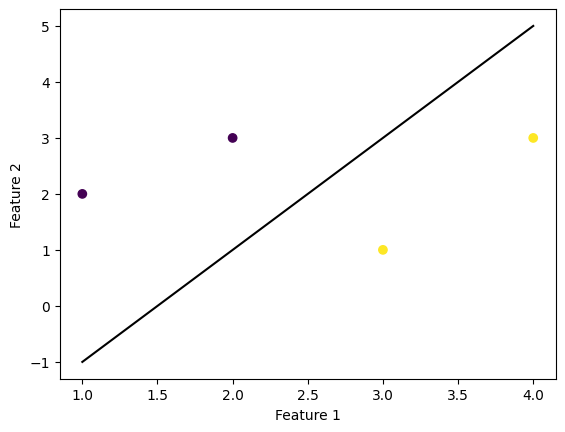

In [3]:

# lets plot decision boundary for this 
w = model.coef_[0] 
b = model.intercept_[0]  
x = np.linspace(1, 4) 
y = -(w[0] / w[1]) * x - b / w[1] 
plt.plot(x, y, 'k-') 
  
# plot data points 
plt.scatter(X[:, 0], X[:, 1], c=Y) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.show()

In [4]:
# Lets predict for two new input samples
n_data = np.array([[5, 2], [2, 1]]) 
pred = model.predict(n_data) 
print(pred)

[1 0]


#### Cover's theorem (kernel trick)
Cover’s Theorem state that, A complex pattern-classification problem, cast in a high-dimensional space nonlinearly, is more likely to be linearly separable than in a low-dimensional space, provided that the space is not densely populated.

Or in simple terms, given a set of training data that is not linearly separable, one can transform it into a training set that is linearly separable by mapping it into a possibly higher-dimensional space via some non-linear transformation.

![Kernel trick](img/kernel_trick.png)

Why do we choose non linear transformation? I will leave this to reader to ponder upon. *(Little hint:- Does linearly transforming training set changes the nature of non linearity it already posses?)*

This theorem gives me hope that every classification can be reduced to simple linearly separable problem. The only thing that we need to take care is to find the appropriate non linear transformation.

##### Exercise

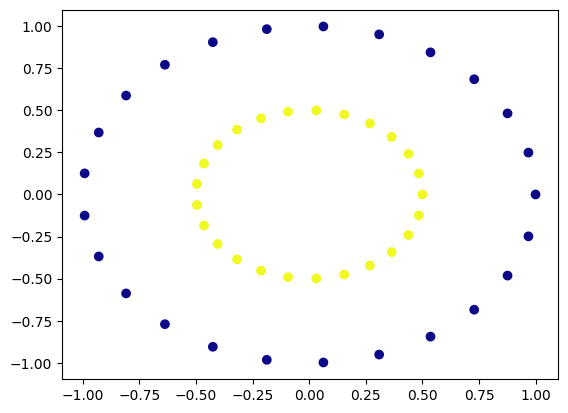

In [5]:
# first lets create non-linear dataset 
x_val, y_val = make_circles(n_samples=50, factor=0.5) 
  
# Now lets plot and see our dataset 
plt.scatter(x_val[:, 0], x_val[:, 1], c=y_val, cmap='plasma') 
plt.show() 

Apply kernel trick to map data into higher-dimensional space (from 2D to 3D):

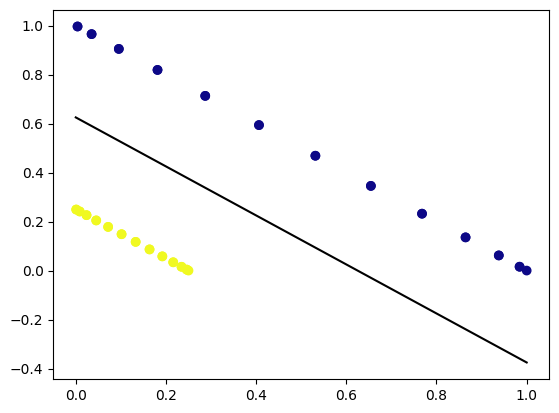

In [6]:
# apply kernel trick to map data into higher-dimensional space 
x_new = np.vstack((x_val[:, 0]**2, x_val[:, 1]**2)).T 
  
# Now fit SVM on mapped data 
svm = svm.SVC(kernel='linear') 
svm.fit(x_new, y_val) 
  
# plot decision boundary in mapped space 
w = svm.coef_ 
a = -w[0][0] / w[0][1] 
x = np.linspace(0, 1) 
y = a * x - (svm.intercept_[0]) / w[0][1] 
plt.plot(x, y, 'k-') 
  
# plot mapped data 
plt.scatter(x_new[:, 0], x_new[:, 1], c=y_val, cmap='plasma') 
plt.show() 

### References
* [Linear Classifiers: An Introduction to Classification](https://medium.com/gadictos/linear-classifiers-an-introduction-to-classification-786fe27eef83)
* [Machine Learning: Bayes Decision Theory](https://www.youtube.com/watch?v=4JscUHGWaB4)
* [Linear and Non-Linear Decision Boundaries in Machine Learning](https://medium.com/@pavi2468kuk/linear-and-non-linear-decision-boundaries-in-machine-learning-9a6cae79ff8e)
* [Linear Separability with Python](https://www.geeksforgeeks.org/linear-separability-with-python/)
* [Kernel Trick and use in Support Vector Machines](https://medium.com/kernel-trick/kernel-trick-and-use-in-support-vector-machines-ffb9d233a7fb)